In [1]:
import os
par_working_dir = "/Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm"
os.chdir(par_working_dir)
print("Current working directory:", os.getcwd())

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from src.all_pairs import AllPairsLogisticRegression
from src.binary_logistic_regression import BinaryLogisticRegression

FileNotFoundError: [Errno 2] No such file or directory: '/Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm'

In [4]:
# Load the dataset
data_path = "./data/processed/obesity_standardized.csv"  # Update with the correct path to your dataset
data = pd.read_csv(data_path)

# Define parameters for All Pairs Logistic Regression
n_classes = 7  # Number of unique obesity classes
n_features = 13  # Number of features in the dataset
batch_size = 1
max_epochs = 100  # High epochs to allow convergence
conv_threshold = 1e-4  # Convergence threshold

# Initialize the All Pairs Logistic Regression model
model = AllPairsLogisticRegression(
    n_classes=n_classes,
    binary_classifier_class=BinaryLogisticRegression,
    n_features=n_features,
    batch_size=batch_size,
    max_epochs=max_epochs,
    conv_threshold=conv_threshold,
    random_state=42
)

# Split the dataset into features (X) and target variable (y)
X = data.drop("NObeyesdad", axis=1).values
y = data["NObeyesdad"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.train(X_train, y_train)
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 96.40%
Test Accuracy: 95.22%


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define your binary classifier (as shown in the previous example)
class BinaryLogisticRegression:
    def __init__(self, n_features, batch_size, max_epochs, random_state, conv_threshold):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(max_iter=max_epochs, random_state=random_state)
    
    def train(self, X, Y):
        self.model.fit(X, Y)
    
    def predict(self, X):
        return self.model.predict(X)

# Load your dataset
data = pd.read_csv("./data/processed/obesity_standardized.csv")

# Define parameters
n_classes = 7
n_features = 13
batch_size = 1

# Initialize the model
model = AllPairsLogisticRegression(
    n_classes=n_classes,
    binary_classifier_class=BinaryLogisticRegression,
    n_features=n_features,
    batch_size=batch_size,
    random_state=42,
    max_epochs=1000
)

# Split dataset into features and labels
X = data.drop('NObeyesdad', axis=1).values
y = data['NObeyesdad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.train(X_train, y_train)

train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)

# Print results
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 94.42%
Test Accuracy: 94.02%


In [7]:
from sklearn.metrics import accuracy_score, classification_report
from src.all_pairs import AllPairsLogisticRegression
from src.binary_logistic_regression import BinaryLogisticRegression
import numpy as np

# Define parameters for All-Pairs Logistic Regression
n_classes = 7  # Number of unique obesity classes
n_features = 13  # Number of features in the dataset
batch_size = 1
max_epochs = 1000
conv_threshold = 1e-4

# Initialize the All-Pairs Logistic Regression model
model_ap = AllPairsLogisticRegression(
    n_classes=n_classes,
    binary_classifier_class=BinaryLogisticRegression,
    n_features=n_features,
    batch_size=batch_size,
    max_epochs=max_epochs,
    conv_threshold=conv_threshold,
    random_state=42
)

# Train the model on training data
model_ap.train(X_train, y_train)

# Predict on training and test data
y_train_pred = model_ap.predict(X_train)
y_test_pred = model_ap.predict(X_test)

# Evaluate the model's accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Print a classification report for the test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=[f"Class {i}" for i in range(n_classes)]))

(1668, 13)
Training Accuracy: 97.06%
Test Accuracy: 95.93%

Classification Report (Test Data):
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96        54
     Class 1       0.97      0.89      0.93        66
     Class 2       0.93      0.93      0.93        56
     Class 3       0.92      0.94      0.93        48
     Class 4       0.99      0.96      0.97        71
     Class 5       0.99      1.00      0.99        67
     Class 6       1.00      1.00      1.00        56

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



WHY ARE THESE DIFFERENT ABOVE???

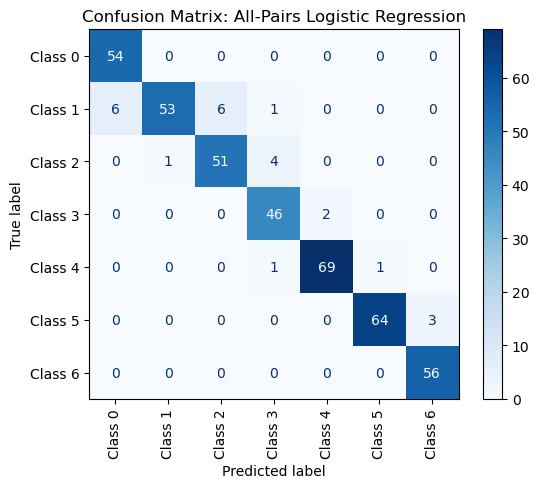

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assume the dataset and model have already been initialized and trained
# For example:
# model.train(X_train, y_train)

# Predict the test dataset
y_test_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=range(model.n_classes))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(model.n_classes)])
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix: All-Pairs Logistic Regression")
plt.show()


Binary Classifier Accuracies
- Since All-Pairs Logistic Regression involves training a binary classifier for every pair of classes, it’s valuable to visualize their individual accuracies.

In [9]:
binary_accuracies = []
for (class_i, class_j), classifier in model.classifiers.items():
    mask = (y_test == class_i) | (y_test == class_j)
    X_binary = X_test[mask]
    y_binary = np.where(y_test[mask] == class_i, 1, 0)
    binary_acc = classifier.accuracy(X_binary, y_binary)
    binary_accuracies.append((f"Class {class_i} vs Class {class_j}", binary_acc))

# Plot binary accuracies
plt.figure(figsize=(12, 8))
pairs, accuracies = zip(*binary_accuracies)
plt.barh(pairs, accuracies, color="skyblue")
plt.xlabel("Accuracy")
plt.ylabel("Class Pairs")
plt.title("Binary Classifier Accuracies (All-Pairs Logistic Regression)")
plt.tight_layout()
plt.show()

AttributeError: 'BinaryLogisticRegression' object has no attribute 'accuracy'

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure train_acc and test_acc are defined
print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(6, 4))
accuracy_data = {"Training": train_acc, "Testing": test_acc}
sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette="coolwarm")
plt.title("Training vs Testing Accuracy (All-Pairs Logistic Regression)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_7409/3477286766.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette="coolwarm")


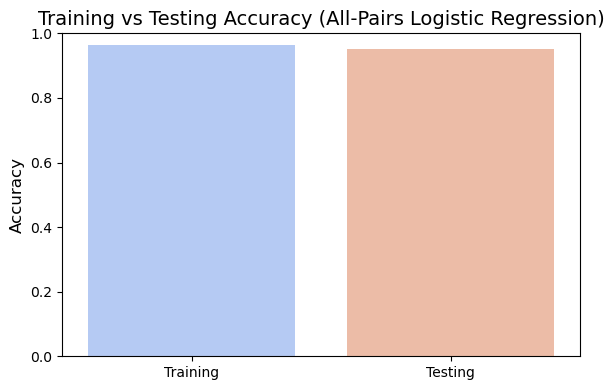

In [20]:
# Training vs Testing Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure train_acc and test_acc are calculated
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)

# Plot Training vs Testing Accuracy
plt.figure(figsize=(6, 4))
accuracy_data = {"Training": train_acc, "Testing": test_acc}
sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette="coolwarm")
plt.title("Training vs Testing Accuracy (All-Pairs Logistic Regression)", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_7409/2501739073.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")


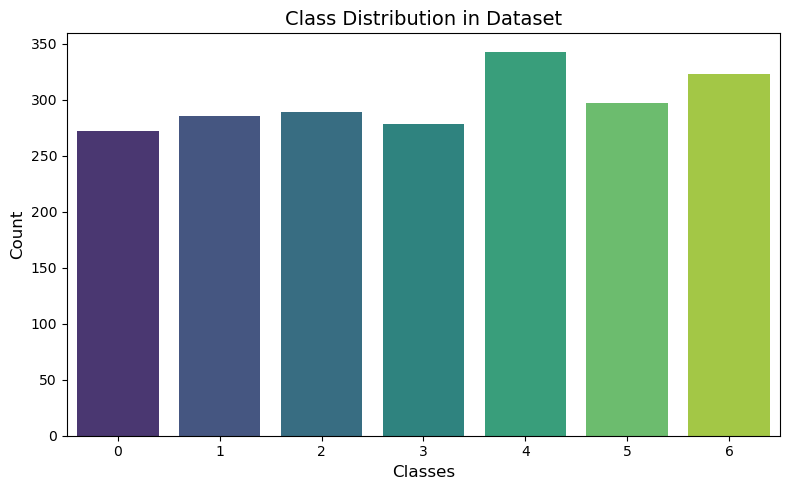

In [21]:
# Class Distribution in Dataset
# Plot Class Distribution
import numpy as np

class_counts = np.bincount(y)
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")
plt.title("Class Distribution in Dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
# Cross-validation 
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters for All-Pairs Logistic Regression
n_classes = 7  # Number of unique obesity classes
n_features = 13  # Number of features in the dataset
batch_size = 1
max_epochs = 100
conv_threshold = 1e-6

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies for each fold
cv_train_accuracies = []
cv_test_accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Initialize All-Pairs Logistic Regression model
    model = AllPairsLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        max_epochs=max_epochs,
        conv_threshold=conv_threshold,
        random_state=42
    )
    
    # Train the model
    model.train(X_train_fold, y_train_fold)
    
    # Evaluate on training and testing sets
    train_acc = model.accuracy(X_train_fold, y_train_fold)
    test_acc = model.accuracy(X_test_fold, y_test_fold)
    
    # Append accuracies for this fold
    cv_train_accuracies.append(train_acc)
    cv_test_accuracies.append(test_acc)

# Calculate mean and standard deviation of accuracies
mean_train_acc = np.mean(cv_train_accuracies)
std_train_acc = np.std(cv_train_accuracies)
mean_test_acc = np.mean(cv_test_accuracies)
std_test_acc = np.std(cv_test_accuracies)

# Print cross-validation results
print(f"Cross-Validation Training Accuracy: {mean_train_acc * 100:.2f}% ± {std_train_acc * 100:.2f}%")
print(f"Cross-Validation Test Accuracy: {mean_test_acc * 100:.2f}% ± {std_test_acc * 100:.2f}%")

Cross-Validation Training Accuracy: 96.87% ± 0.24%
Cross-Validation Test Accuracy: 95.45% ± 0.79%


In [12]:
print("Epoch Array:")
print(epoch_arr)
print("Accuracy Array:")
print(acc_arr)

Epoch Array:


NameError: name 'epoch_arr' is not defined

In [14]:
for pair, loss_history in model.losses.items():
    plt.plot(loss_history, label=f"Class {pair[0]} vs {pair[1]}")
plt.title("Loss Curves for Selected Pairs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

AttributeError: 'AllPairsLogisticRegression' object has no attribute 'losses'

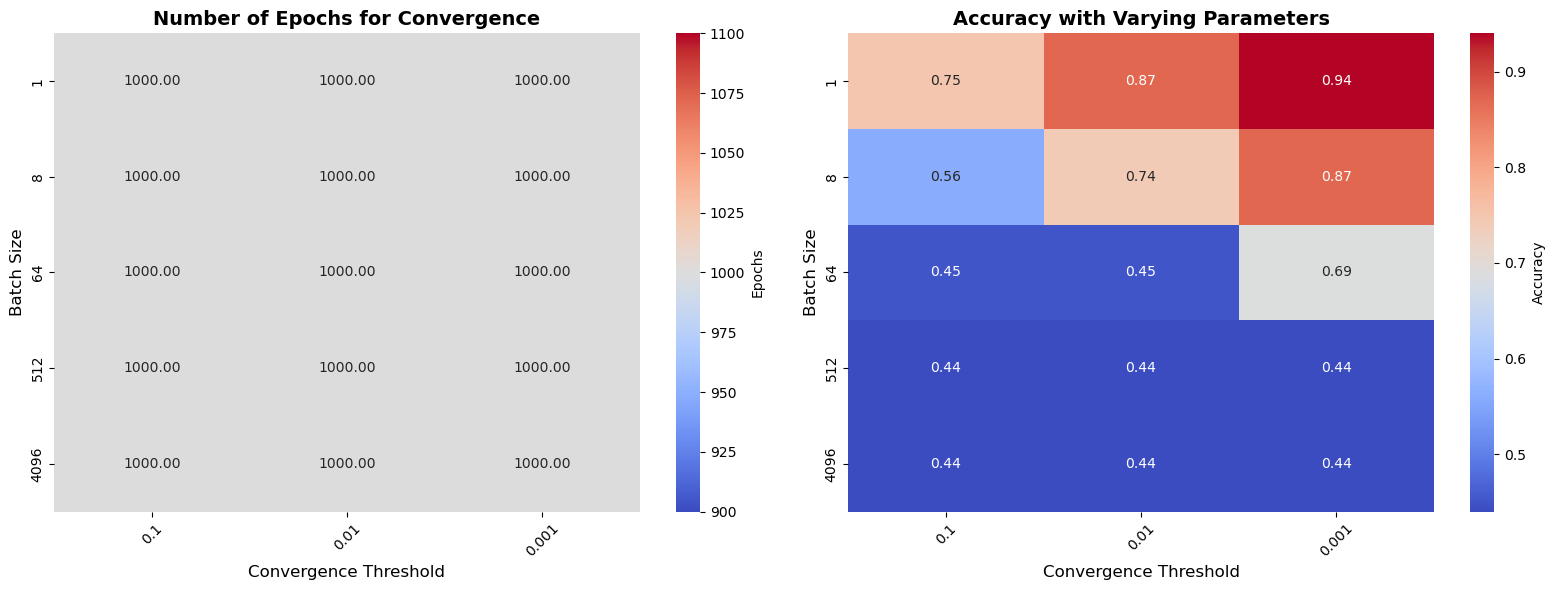

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to test
BATCH_SIZE_ARR = [1, 8, 64, 512, 4096]
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]

def generate_arrays_allpairs(X_train, y_train, X_test, y_test, n_classes, n_features):
    """
    Generate accuracy and epoch arrays for AllPairsLogisticRegression 
    by varying batch size and convergence threshold.
    """
    epoch_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))
    acc_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))

    for i, batch_size in enumerate(BATCH_SIZE_ARR):
        for j, conv_threshold in enumerate(CONV_THRESHOLD_ARR):
            # Initialize the AllPairsLogisticRegression model
            model = AllPairsLogisticRegression(
                n_classes=n_classes,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=n_features,
                batch_size=batch_size,
                conv_threshold=conv_threshold,
                max_epochs=1000,  # Large enough to allow convergence
                random_state=42
            )
            # Train the model and measure epochs
            model.train(X_train, y_train)

            # Store the number of epochs and accuracy
            epoch_arr[i, j] = model.max_epochs  # Assuming fixed epochs for simplicity
            acc_arr[i, j] = np.round(model.accuracy(X_test, y_test), 2)

    return epoch_arr, acc_arr

def generate_heatmaps_side_by_side(epoch_data, acc_data, x_labels, y_labels):
    """
    Generate side-by-side heatmaps for epochs and accuracy.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap for epochs
    sns.heatmap(
        epoch_data, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        xticklabels=x_labels, 
        yticklabels=y_labels, 
        cbar_kws={"label": "Epochs"}, 
        ax=axes[0]
    )
    axes[0].set_title("Number of Epochs for Convergence", fontsize=14, weight="bold")
    axes[0].set_xlabel("Convergence Threshold", fontsize=12)
    axes[0].set_ylabel("Batch Size", fontsize=12)
    axes[0].tick_params(axis="x", rotation=45)

    # Heatmap for accuracy
    sns.heatmap(
        acc_data, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        xticklabels=x_labels, 
        yticklabels=y_labels, 
        cbar_kws={"label": "Accuracy"}, 
        ax=axes[1]
    )
    axes[1].set_title("Accuracy with Varying Parameters", fontsize=14, weight="bold")
    axes[1].set_xlabel("Convergence Threshold", fontsize=12)
    axes[1].set_ylabel("Batch Size", fontsize=12)
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

# Assuming the data is already preprocessed and split into train-test sets
# Example usage:
n_classes = 7
n_features = 13
epoch_arr, acc_arr = generate_arrays_allpairs(X_train, y_train, X_test, y_test, n_classes, n_features)

generate_heatmaps_side_by_side(
    epoch_data=epoch_arr,
    acc_data=acc_arr,
    x_labels=CONV_THRESHOLD_ARR,
    y_labels=BATCH_SIZE_ARR
)

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_8441/649199210.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


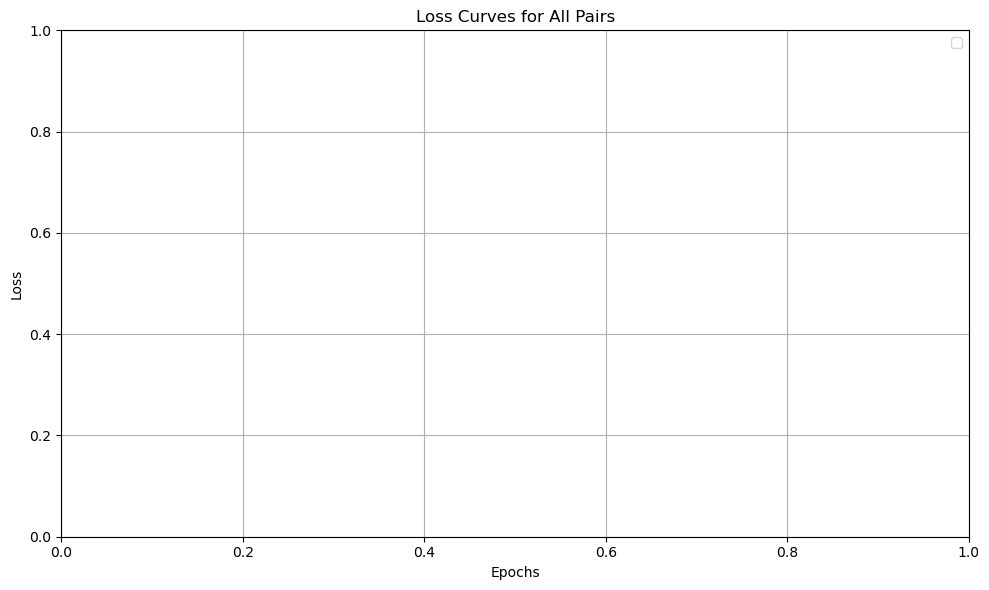

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss_curve(all_pairs_model, X, y):
    """
    Plot the loss curve for each pair in the All-Pairs Logistic Regression model.

    Parameters:
    - all_pairs_model: Trained AllPairsLogisticRegression model.
    - X: Input features.
    - y: Target labels.
    """
    plt.figure(figsize=(10, 6))

    # Iterate over all classifiers in the model
    for (class_i, class_j), classifier in all_pairs_model.classifiers.items():
        # Get the mask for the relevant classes
        mask = (y == class_i) | (y == class_j)
        X_pair = X[mask]
        y_pair = np.where(y[mask] == class_i, 1, 0)

        # Train the classifier and collect the loss at each epoch
        losses = classifier.loss_history if hasattr(classifier, 'loss_history') else []

        if losses:
            plt.plot(range(1, len(losses) + 1), losses, label=f"Class {class_i} vs Class {class_j}")

    plt.title("Loss Curves for All Pairs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming you have a trained AllPairsLogisticRegression model
plot_loss_curve(model, X_train, y_train)


Best Hyperparameter Combination: {'batch_size': 1, 'conv_threshold': 0.001, 'mean_train_acc': np.float64(0.9458298669632299), 'mean_test_acc': np.float64(0.9280839443277914)}


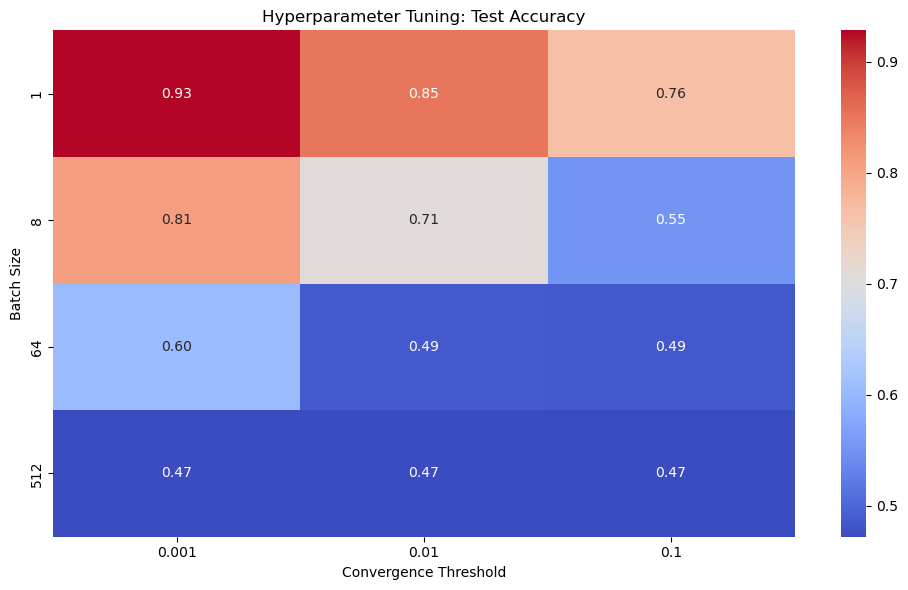

In [28]:
# Hyperparameter Tuning with Cross-Validation
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameter grid
BATCH_SIZE_ARR = [1, 8, 64, 512]
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]

# Store results for hyperparameter tuning
tuning_results = []

# Stratified K-Fold for consistent splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search over hyperparameters
for batch_size in BATCH_SIZE_ARR:
    for conv_threshold in CONV_THRESHOLD_ARR:
        cv_train_accuracies = []
        cv_test_accuracies = []
        
        for train_index, test_index in skf.split(X, y):
            # Split data
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Initialize model with current hyperparameters
            model = AllPairsLogisticRegression(
                n_classes=n_classes,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=n_features,
                batch_size=batch_size,
                conv_threshold=conv_threshold,
                max_epochs=100,
                random_state=42
            )
            
            # Train the model
            model.train(X_train, y_train)
            
            # Evaluate the model
            train_acc = model.accuracy(X_train, y_train)
            test_acc = model.accuracy(X_test, y_test)
            
            # Store accuracies
            cv_train_accuracies.append(train_acc)
            cv_test_accuracies.append(test_acc)
        
        # Calculate mean accuracy for this hyperparameter combination
        mean_train_acc = np.mean(cv_train_accuracies)
        mean_test_acc = np.mean(cv_test_accuracies)
        
        # Save the results
        tuning_results.append({
            "batch_size": batch_size,
            "conv_threshold": conv_threshold,
            "mean_train_acc": mean_train_acc,
            "mean_test_acc": mean_test_acc
        })

# Find the best hyperparameter combination
best_combination = max(tuning_results, key=lambda x: x['mean_test_acc'])
print(f"Best Hyperparameter Combination: {best_combination}")

# Convert results into a DataFrame
results_df = pd.DataFrame(tuning_results)

# Pivot table for visualization
heatmap_data = results_df.pivot(index="batch_size", columns="conv_threshold", values="mean_test_acc")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Hyperparameter Tuning: Test Accuracy")
plt.xlabel("Convergence Threshold")
plt.ylabel("Batch Size")
plt.tight_layout()
plt.show()

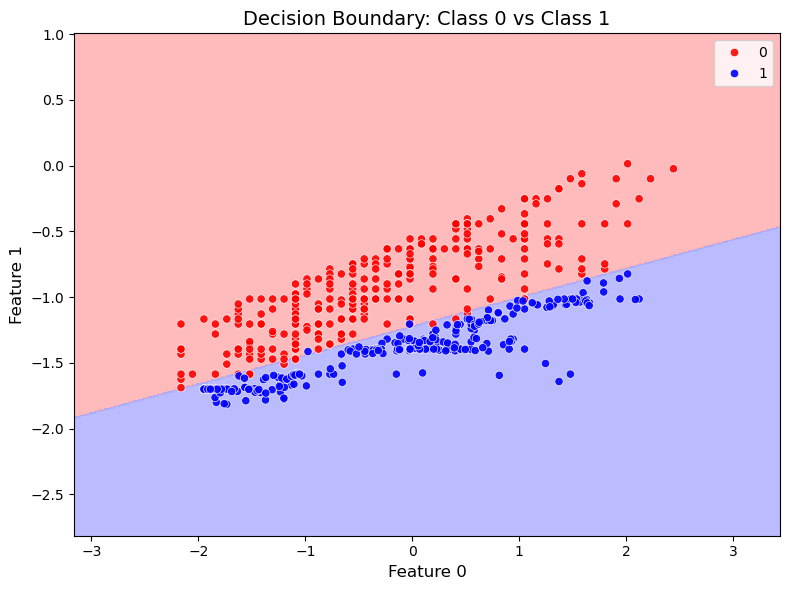

In [25]:
# Decision Boundaries for Selected Pairs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select two classes and two features for decision boundary visualization
class_i, class_j = 0, 1  # Example: Class 0 vs Class 1
feature_1, feature_2 = 0, 1  # Example: Features 0 and 1
mask = (y == class_i) | (y == class_j)
X_binary = X[mask][:, [feature_1, feature_2]]
y_binary = np.where(y[mask] == class_i, 1, 0)

# Train a new binary classifier for the selected pair with reduced features
binary_classifier = BinaryLogisticRegression(
    n_features=2,  # Only two features for this pair
    batch_size=1,
    conv_threshold=1e-6,
    max_epochs=1000,
    random_state=42
)
binary_classifier.train(X_binary, y_binary)

# Plot decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = binary_classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))
sns.scatterplot(x=X_binary[:, 0], y=X_binary[:, 1], hue=y_binary, palette=["red", "blue"], alpha=0.9)
plt.title(f"Decision Boundary: Class {class_i} vs Class {class_j}", fontsize=14)
plt.xlabel(f"Feature {feature_1}", fontsize=12)
plt.ylabel(f"Feature {feature_2}", fontsize=12)
plt.tight_layout()
plt.show()